In [67]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# load the data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [113]:
# eda, preprocess the data and feature engineering

In [114]:
# summary statistics
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [115]:
# features missing data include travel_with, total_female, total_male, and most_impressing.
# total_female and total_male are only missing 3 and 5 data points respectively.
# travel_with contains the highest number of missing data, which means imputing by mode might lead to
# some bias, but for the first step to dealing with this. I'll apply mode to all features missing
# any data.

mode_values = train.mode().loc[0]

In [116]:
train.fillna(mode_values, inplace=True)
test.fillna(mode_values, inplace=True)

In [117]:
# features total_female, total_male, night_mainland, and night_zanzibar have
# also been represented as type float. These will be converted into type int.
# package_* features, payment_mode and first_trip_tz features represent a binary type
# of data, Yes/No, Cash/Credit Card, so these features will be binary encoded.

In [118]:
# change types
train["total_female"] = train["total_female"].astype("int")
train["total_male"] = train["total_male"].astype("int")
train["night_mainland"] = train["night_mainland"].astype("int")
train["night_zanzibar"] = train["night_zanzibar"].astype("int")

test["total_female"] = test["total_female"].astype("int")
test["total_male"] = test["total_male"].astype("int")
test["night_mainland"] = test["night_mainland"].astype("int")
test["night_zanzibar"] = test["night_zanzibar"].astype("int")

In [119]:
# binary encode
train["package_transport_int"] = np.where(train["package_transport_int"].str.contains("Yes"), 1, 0)
train["package_accomodation"] = np.where(train["package_accomodation"].str.contains("Yes"), 1, 0)
train["package_food"] = np.where(train["package_food"].str.contains("Yes"), 1, 0)
train["package_transport_tz"] = np.where(train["package_transport_tz"].str.contains("Yes"), 1, 0)
train["package_sightseeing"] = np.where(train["package_sightseeing"].str.contains("Yes"), 1, 0)
train["package_guided_tour"] = np.where(train["package_guided_tour"].str.contains("Yes"), 1, 0)
train["package_insurance"] = np.where(train["package_insurance"].str.contains("Yes"), 1, 0)

test["package_transport_int"] = np.where(test["package_transport_int"].str.contains("Yes"), 1, 0)
test["package_accomodation"] = np.where(test["package_accomodation"].str.contains("Yes"), 1, 0)
test["package_food"] = np.where(test["package_food"].str.contains("Yes"), 1, 0)
test["package_transport_tz"] = np.where(test["package_transport_tz"].str.contains("Yes"), 1, 0)
test["package_sightseeing"] = np.where(test["package_sightseeing"].str.contains("Yes"), 1, 0)
test["package_guided_tour"] = np.where(test["package_guided_tour"].str.contains("Yes"), 1, 0)
test["package_insurance"] = np.where(test["package_insurance"].str.contains("Yes"), 1, 0)

train["payment_mode"] = np.where(train["payment_mode"].str.contains("Cash"), 1, 0)
test["payment_mode"] = np.where(test["payment_mode"].str.contains("Cash"), 1, 0)

train["first_trip_tz"] = np.where(train["first_trip_tz"].str.contains("Yes"), 1, 0)
test["first_trip_tz"] = np.where(test["first_trip_tz"].str.contains("Yes"), 1, 0)

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   int64  
 5   total_male             4809 non-null   int64  
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   int64  
 11  package_accomodation   4809 non-null   int64  
 12  package_food           4809 non-null   int64  
 13  package_transport_tz   4809 non-null   int64  
 14  package_sightseeing    4809 non-null   int64  
 15  pack

In [121]:
train.describe()

,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926804,1.009565,0.301934,0.458931,0.428571,0.393013,0.309836,0.322312,0.151799,8.488043,2.304429,0.867540,0.674361,8.114389e+06
std,1.287841,1.138273,0.459144,0.498362,0.494923,0.488470,0.462474,0.467410,0.358863,10.427624,4.227080,0.339025,0.468662,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000,3.397875e+06
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,4.000000,1.000000,1.000000,9.945000e+06
max,49.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,145.000000,61.000000,1.000000,1.000000,9.953288e+07


In [122]:
# the min-max difference between some of out numerical features are very large so I might 
# apply some scaling to the data as a preprocessing step to training.

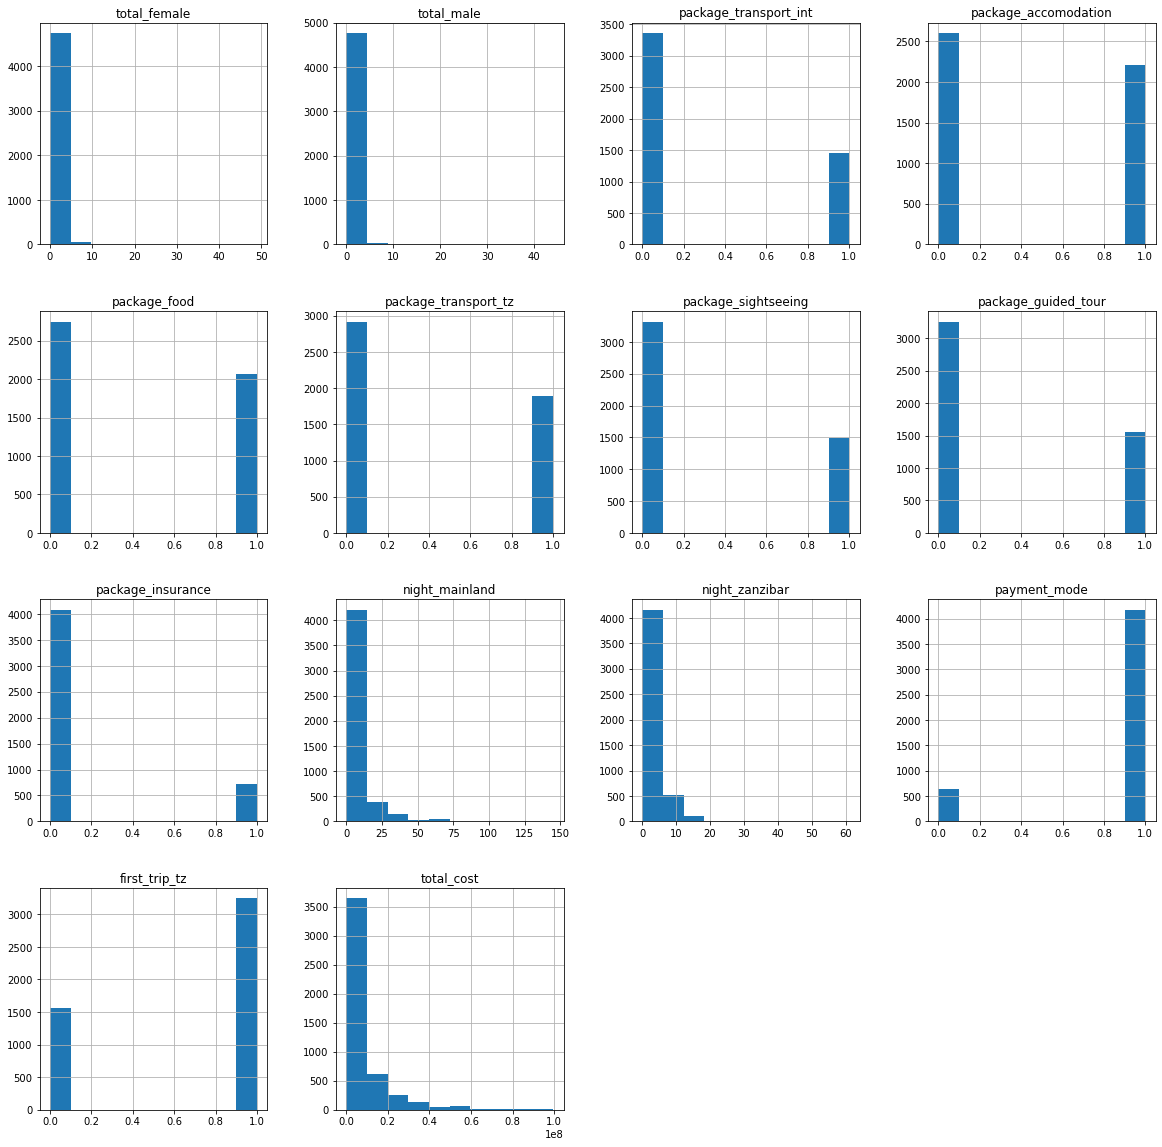

In [123]:
# graphical statistics
train.hist(figsize=(20, 20));
plt.show()

In [124]:
# categorical data with type object didn't show up in the above histogram above so I'll perform their
# eda separately later, if necessary. Some of these features have a potentiality of being one hot encoded.

In [125]:
# information we can get from country feature is from which country is tourism in Tanzania more popular.
# purpose feature can help determine the most popular reasons for visiting (can be dropped), but main_activity can show which
# toursim activities are most popular in the country.

# train["tour_arrangement"].nunique()
# tour arragement is also a binary type so this will also be binary encoded.

In [126]:
train.drop(columns=["purpose"], axis=1, inplace=True)
test.drop(columns=["purpose"], axis=1, inplace=True)

In [127]:
train["tour_arrangement"] = np.where(train["tour_arrangement"].str.contains("Independent"), 1, 0)
test["tour_arrangement"] = np.where(test["tour_arrangement"].str.contains("Independent"), 1, 0)

In [128]:
# info_source and most_impressing features seem to represent multiple combinations of information
# which may be a lot more difficult to encode or preprocess for the model, so I'll drop these.

# the features themselves can be a great source of information to the government of Tanzania
# in helping them determine which sources to use for advertisment purposes.

print(train["info_source"].nunique(), train["info_source"].unique())
print(train["most_impressing"].nunique(), train["most_impressing"].unique())

8 ['Friends, relatives' 'others' 'Travel, agent, tour operator'
 'Radio, TV, Web' 'Tanzania Mission Abroad' 'inflight magazines'
 'Newspaper, magazines,brochures' 'Trade fair']
7 ['Friendly People' 'Wonderful Country, Landscape, Nature'
 'Excellent Experience' 'No comments' ' Wildlife' 'Good service'
 'Satisfies and Hope Come Back']


In [129]:
features_to_drop = ["info_source", "most_impressing"]

train.drop(columns=features_to_drop, axis=1, inplace=True)
test.drop(columns=features_to_drop, axis=1, inplace=True)

In [130]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1,1,Wildlife tourism,1,0,0,0,0,0,0,0,13,0,1,0,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1,0,Cultural tourism,1,0,0,0,0,0,0,0,14,7,1,1,3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0,1,Cultural tourism,1,0,0,0,0,0,0,0,1,31,1,0,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1,1,Wildlife tourism,0,0,1,1,1,1,1,0,11,0,1,1,7790250.0
4,tour_1004,CHINA,1-24,Alone,1,0,Wildlife tourism,1,0,0,0,0,0,0,0,7,4,1,1,1657500.0


In [ ]:
# more data preprocessing

In [ ]:
# ml process
# 1. Model Selection
# 2. Model Training
# 3. Model Evaluation

In [ ]:
# submission